# Investigate a Dataset (TMDB Movie Data)¶

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Once we start to look at the TMDB dataset, we can start to notice some correlations or trends between different characteristics. The dataset will help us in understanding the various features and how they can be used to generate higher revenues.

The questions that we will work on would be:

><b> 1. </b> How much has the revenue generation changed over time?<br>
><b> 2. </b> Which movie genres has the best ratings in the entire time period of the dataset?<br>
><b> 3. </b> Which movie genres have the highest revenue generation?<br>
><b> 4. </b> Which director is responsible for the highest revenue generation?

In [1]:
# Importing the libraries that we shall use in this analysis

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

<a id='wrangling'></a>
## Data Wrangling

### Observations

> <b>1.</b> Many unwanted columns present in our dataset, that we do not need for the process of analysis.<br>
> <b>2.</b> There are some missing values in the 'director' and 'genre' section.<br>
> <b>3.</b> Incase of the revenue and budget section, we have many '0' values. We cannot find the proper mean of these columns, if these null values exist.<br>
> <b>4.</b> Genre and director column contain numerous values per cell delimite by '|', which will prevent us from forming correct groups of these data.

In [2]:
#Load dataset.
# Original Dataset from https://www.kaggle.com/tmdb/tmdb-movie-metadata
tmdb_data=pd.read_csv('tmdb-movies.csv')

In [3]:
#Listing the columns of the dataset
tmdb_data.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [4]:
#Basic information of the columns.
tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
tmdb_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Data Cleaning
><b>1. </b>Now in this stage, we will remove the unnecessary data and extract the relavant data from the main dataset. Now there is some null data in our genre and director column, so we need to remove this using the <em>dropna</em> method.<br>
><b>2. </b>We can remove the budget and revenue coloumns, since the columns, 'revenue_adj' and 'budget_adj' are more appropriate since they take into consideration inflation.<br>
><b>3. </b>Also we will remove certain columns like id, imdb_id, cast, etc. as they are currently not needed in our analysis.<br>
><b>4. </b>Delimiting of genre and director columns will be done through the <em>assign</em> and <em>explode</em> methods.<br>
><b>5. </b>When using the mean method on 'budget_adj' and 'revenue_adj' columns, we need to make sure to remove the cells with the 0 values. <br>

<b> We must note that whenever required, we will further clean the dataset as cleaning or removing values right now will cause a significant decrease in data and cause incorrect data analysis.<br>
Also, for each question we will create a copy of the original cleaned dataframe as the changes required for one question might not be suitable for thte other.
</b>

In [6]:
#After discussing the problem and charactersistics of the dataset, we will start to perform the cleaning process.
#First we will remove the unewanted columns from the dataset.
unused_columns=['id','imdb_id','budget', 'revenue','cast','homepage','tagline','keywords','overview','runtime', \
                'production_companies','release_date','vote_count']
tmdb_data.drop(unused_columns,axis=1,inplace=True)

In [7]:
tmdb_data.head()

,popularity,original_title,director,genres,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,James Wan,Action|Crime|Thriller,7.3,2015,1.747999e+08,1.385749e+09


In [8]:
#Remove the scientific notation being used in order to avoid confusion
pd.options.display.float_format = '{:,.1f}'.format
tmdb_data.head()

,popularity,original_title,director,genres,vote_average,release_year,budget_adj,revenue_adj
0,33.0,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,6.5,2015,"137,999,939.3","1,392,445,892.5"
1,28.4,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,7.1,2015,"137,999,939.3","348,161,292.5"
2,13.1,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,6.3,2015,"101,199,955.5","271,619,025.4"
3,11.2,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,7.5,2015,"183,999,919.0","1,902,723,129.8"
4,9.3,Furious 7,James Wan,Action|Crime|Thriller,7.3,2015,"174,799,923.1","1,385,748,801.5"


In [9]:
#Converting budget and revenue in millions
tmdb_data['budget_adj'] = tmdb_data['budget_adj']/1000000
tmdb_data['revenue_adj'] = tmdb_data['revenue_adj']/1000000

In [10]:
#renaming some columns for better understanding.
tmdb_data.rename(columns = {"budget_adj": "budget", "revenue_adj": "revenue"}, inplace=True)

We can use the names budget and revenue as we have already removed the original columns and making these changes for our cleaned dataframe

In [11]:
tmdb_data.head()

,popularity,original_title,director,genres,vote_average,release_year,budget,revenue
0,33.0,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,6.5,2015,138.0,"1,392.4"
1,28.4,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,7.1,2015,138.0,348.2
2,13.1,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,6.3,2015,101.2,271.6
3,11.2,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,7.5,2015,184.0,"1,902.7"
4,9.3,Furious 7,James Wan,Action|Crime|Thriller,7.3,2015,174.8,"1,385.7"


<a id='eda'></a>
## Exploratory Data Analysis

#### Research Question 1: "How much has the revenue generation changed over time"?
Initially, we make a new dataframe from the original cleaned dataframe and perform changes in it which are only required for the analysis according to this question. The new dataframe is made so that we don't accidently make changes in the original cleaned dataset.<br>
Now we remove the cells with 0 as thier value in the total_revenue and total_budget columns, as it will affect the analysis.


In [12]:
tmdb_br = tmdb_data.query('budget > 0 & revenue > 0')
tmdb_br.head()

,popularity,original_title,director,genres,vote_average,release_year,budget,revenue
0,33.0,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,6.5,2015,138.0,"1,392.4"
1,28.4,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,7.1,2015,138.0,348.2
2,13.1,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,6.3,2015,101.2,271.6
3,11.2,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,7.5,2015,184.0,"1,902.7"
4,9.3,Furious 7,James Wan,Action|Crime|Thriller,7.3,2015,174.8,"1,385.7"


In [13]:
tmdb_br_year=tmdb_br.groupby('release_year').revenue.mean()

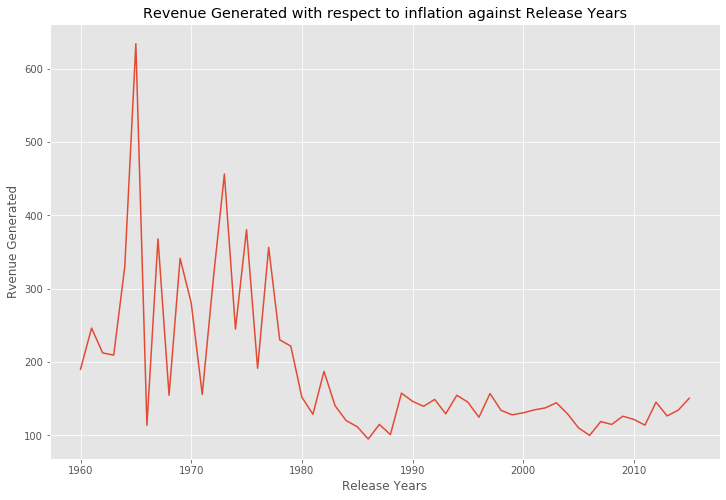

In [14]:
#Plot the graph
fig, ax = plt.subplots(figsize=(12,8))
tmdb_br_year.plot(kind='line', legend = False, ax=ax)
ax.set_xlabel('Release Years')
ax.set_ylabel('Rvenue Generated')
ax.set_title('Revenue Generated with respect to inflation against Release Years');

The above graph shows that there has been <b>a significant decrease in revenue generation over the years.</b> Even though the amount of revenue is far more but due to the inflation the value of this revenue has certainly decreased.

#### Research Question 2: "Which movie genres has the best ratings in the entire time period of the dataset"?
We need to seperate the genres which are bound together in a cell using delimiters, i.e., ( | ). Also there are some null values in the genre column, we need to drop those too.

In [15]:
#Copying the dataframe to a new dataframe
tmdb_genres = tmdb_data.copy()

In [16]:
tmdb_genres.isnull().sum()

popularity         0
original_title     0
director          44
genres            23
vote_average       0
release_year       0
budget             0
revenue            0
dtype: int64

In [17]:
tmdb_genres.dropna(inplace=True)

In [18]:
tmdb_genres.isnull().sum()

popularity        0
original_title    0
director          0
genres            0
vote_average      0
release_year      0
budget            0
revenue           0
dtype: int64

In [19]:
#We need to reindex the dataframe as we remove some values
tmdb_genres.sort_values('vote_average',ascending=False, inplace=True)
tmdb_genres.reset_index(drop=True,inplace=True)
tmdb_genres.head()

,popularity,original_title,director,genres,vote_average,release_year,budget,revenue
0,0.0,The Story of Film: An Odyssey,Mark Cousins,Documentary,9.2,2011,0.0,0.0
1,0.1,The Mask You Live In,Jennifer Siebel Newsom,Documentary,8.9,2015,0.0,0.0
2,0.2,Life Cycles,Derek Frankowski,Documentary,8.8,2010,0.0,0.0
3,0.1,Black Mirror: White Christmas,Carl Tibbetts,Drama|Horror|Mystery|Science Fiction|Thriller,8.8,2014,0.0,0.0
4,0.2,Pink Floyd: Pulse,David Mallet,Music,8.7,2006,0.0,0.0


In [20]:
#Split the genres which are bound together
genre_df=tmdb_genres.assign(genres=tmdb_genres['genres'].str.split('|')).explode('genres').reset_index(drop=True)

In [21]:
genre_df.head()

,popularity,original_title,director,genres,vote_average,release_year,budget,revenue
0,0.0,The Story of Film: An Odyssey,Mark Cousins,Documentary,9.2,2011,0.0,0.0
1,0.1,The Mask You Live In,Jennifer Siebel Newsom,Documentary,8.9,2015,0.0,0.0
2,0.2,Life Cycles,Derek Frankowski,Documentary,8.8,2010,0.0,0.0
3,0.1,Black Mirror: White Christmas,Carl Tibbetts,Drama,8.8,2014,0.0,0.0
4,0.1,Black Mirror: White Christmas,Carl Tibbetts,Horror,8.8,2014,0.0,0.0


In [22]:
genre_df.groupby(['genres']).vote_average.mean()

genres
Action            5.8
Adventure         5.9
Animation         6.4
Comedy            5.9
Crime             6.1
Documentary       6.9
Drama             6.2
Family            6.0
Fantasy           5.9
Foreign           6.0
History           6.4
Horror            5.3
Music             6.5
Mystery           5.9
Romance           6.0
Science Fiction   5.7
TV Movie          5.7
Thriller          5.8
War               6.3
Western           6.1
Name: vote_average, dtype: float64

In [23]:
##grouping the dataframe with genre against mean rating
gen_rat=genre_df.groupby(['genres']).vote_average.mean()

In [24]:
gen_rat.sort_values(inplace=True)

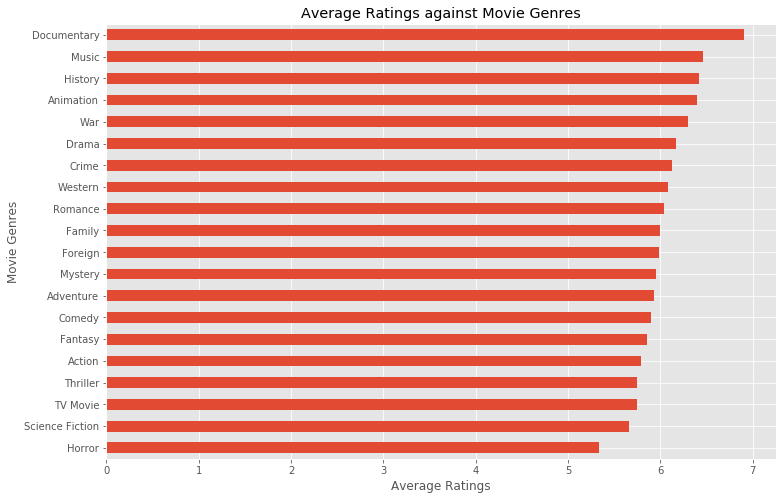

In [25]:
fig, ax = plt.subplots(figsize=(12,8))
gen_rat.plot(kind='barh', legend = False, ax=ax)
ax.set_xlabel('Average Ratings')
ax.set_ylabel('Movie Genres')
ax.set_title('Average Ratings against Movie Genres');

We can see here that the genres <b>'Documentary', 'Music', 'History'</b> and <b>'Animation'</b> have been liked by people alot over these years.

#### Research Question 3: "Which movie genres have the highest revenue generation"?
We can use the cleaned dataframe <b>genre_df</b> that was used in the previous question as we need to split the genres for this question as well.

In [26]:
#However we need to remove the cells with revenue =0, as we are performing an analysis on the revenue.
genre_df = genre_df.query("revenue > 0")
genre_df.reset_index(drop=True)

,popularity,original_title,director,genres,vote_average,release_year,budget,revenue
0,7.2,The Shawshank Redemption,Frank Darabont,Drama,8.4,1994,36.8,41.7
1,7.2,The Shawshank Redemption,Frank Darabont,Crime,8.4,1994,36.8,41.7
2,0.3,Stop Making Sense,Jonathan Demme,Documentary,8.4,1984,2.5,10.5
3,0.3,Stop Making Sense,Jonathan Demme,Music,8.4,1984,2.5,10.5
4,5.7,The Godfather,Francis Ford Coppola,Drama,8.3,1972,31.3,"1,277.9"
...,...,...,...,...,...,...,...,...
12660,0.1,Foodfight!,Lawrence Kasanoff,Action,2.2,2012,61.7,0.1
12661,0.1,Foodfight!,Lawrence Kasanoff,Comedy,2.2,2012,61.7,0.1
12662,0.1,Foodfight!,Lawrence Kasanoff,Family,2.2,2012,61.7,0.1
12663,0.2,Superbabies: Baby Geniuses 2,Bob Clark,Family,2.1,2004,0.0,10.5


In [27]:
#grouping the dataframe with genre against the mean revenue
gen_rev=genre_df.groupby(['genres']).revenue.mean()
gen_rev.sort_values(inplace=True)

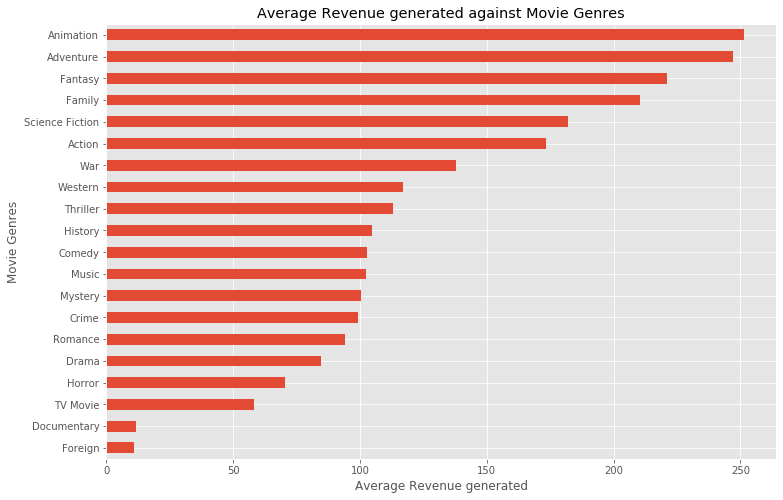

In [28]:
fig, ax = plt.subplots(figsize=(12,8))
gen_rev.plot(kind='barh', legend = False, ax=ax)
ax.set_ylabel('Movie Genres')
ax.set_xlabel('Average Revenue generated')
ax.set_title('Average Revenue generated against Movie Genres');

We can see that the <b>Animation</b> and  <b>Adventure</b> genres have generated the most revenue in the time period.

#### Research Question 4: "Which director is responsible for the highest revenue generation?"?
We will again make a copy of the original cleaned dataframe for this question. Also, like genre we need to split the director cells in this as there can be multiple director of a single movie.

In [29]:
tmdb_dir=tmdb_data.copy()

In [30]:
#We remove the null values from the dataframe
tmdb_dir.isnull().sum()

popularity         0
original_title     0
director          44
genres            23
vote_average       0
release_year       0
budget             0
revenue            0
dtype: int64

In [31]:
tmdb_dir.dropna(inplace=True)

In [32]:
tmdb_dir.isnull().sum()

popularity        0
original_title    0
director          0
genres            0
vote_average      0
release_year      0
budget            0
revenue           0
dtype: int64

In [33]:
#However we need to remove the cells with revenue =0, as we are performing an analysis on the revenue.
tmdb_dir = tmdb_dir.query("revenue > 0")
tmdb_dir.reset_index(drop=True)
tmdb_dir.head()

,popularity,original_title,director,genres,vote_average,release_year,budget,revenue
0,33.0,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,6.5,2015,138.0,"1,392.4"
1,28.4,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,7.1,2015,138.0,348.2
2,13.1,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,6.3,2015,101.2,271.6
3,11.2,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,7.5,2015,184.0,"1,902.7"
4,9.3,Furious 7,James Wan,Action|Crime|Thriller,7.3,2015,174.8,"1,385.7"


In [34]:
#Spliting the cells with delimiter ( | ) present.
tmdb_dir=tmdb_dir.assign(director=tmdb_dir['director'].str.split('|')).explode('director').reset_index(drop=True)

In [35]:
#We group the directors together keeping the "original title" as index so as to find the number of movies directed 
#by each director and extract the top 15 directors from that.
dir_df = (tmdb_dir.groupby(['director'])['original_title'].count()).sort_values(ascending=False)
dir_df = dir_df[:15]
dir_df.head()

director
Steven Spielberg    28
Clint Eastwood      26
Woody Allen         22
Ridley Scott        22
Martin Scorsese     18
Name: original_title, dtype: int64

In [36]:
dir_df.sort_values(ascending=True)

director
Renny Harlin         15
Oliver Stone         15
Rob Reiner           15
Brian De Palma       15
Joel Schumacher      16
Tony Scott           16
Robert Rodriguez     17
Tim Burton           17
Steven Soderbergh    17
Martin Scorsese      18
Ron Howard           18
Woody Allen          22
Ridley Scott         22
Clint Eastwood       26
Steven Spielberg     28
Name: original_title, dtype: int64

Now we need to extract all the movies directed by these directors only from our cleaned dataframe so as to find the highest revenue generated director

In [37]:
#We use a temperory dataframe to append all the movies by the top directors and then save it in our dir_df dataframe.
temp_df = pd.DataFrame()
for direct,v in dir_df.items():
    temp_df = temp_df.append(tmdb_dir[tmdb_dir['director'].str.contains(direct)],ignore_index=True)
dir_df = temp_df

In [38]:
dir_df.head()

,popularity,original_title,director,genres,vote_average,release_year,budget,revenue
0,3.6,Bridge of Spies,Steven Spielberg,Thriller|Drama,7.1,2015,36.8,149.6
1,1.1,Close Encounters of the Third Kind,Steven Spielberg,Science Fiction|Drama,7.0,1977,72.0,"1,093.0"
2,3.0,A.I. Artificial Intelligence,Steven Spielberg,Drama|Science Fiction|Adventure,6.6,2001,123.1,290.5
3,3.2,Indiana Jones and the Kingdom of the Crystal S...,Steven Spielberg,Adventure|Action,5.6,2008,187.4,796.7
4,2.2,The Adventures of Tintin,Steven Spielberg,Adventure|Animation|Action|Family|Mystery,6.6,2011,126.0,360.6


In [39]:
dir_df=dir_df.groupby(['director']).revenue.mean()
dir_df.sort_values(inplace=True)

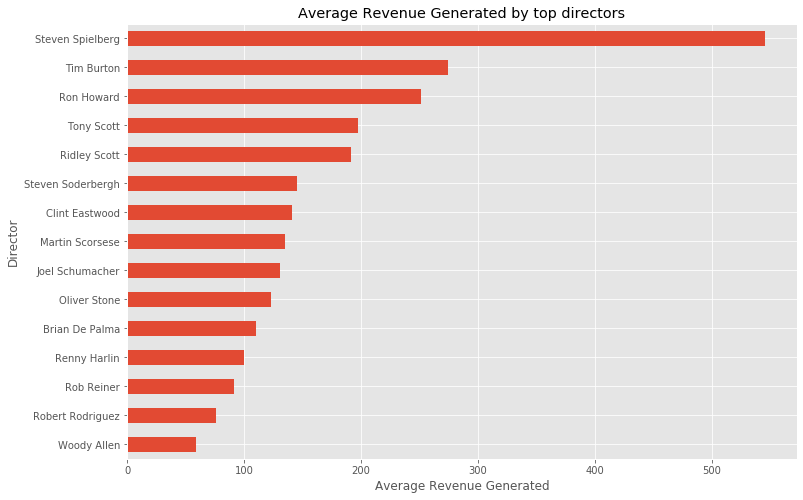

In [40]:
fig, ax = plt.subplots(figsize=(12,8))
dir_df.plot(kind='barh', legend = False, ax=ax)
ax.set_ylabel('Director')
ax.set_xlabel('Average Revenue Generated')
ax.set_title('Average Revenue Generated by top directors');

We can clearly see here that Steven Spielberg has generated the most revenue even though he has worked on the most number of films. This statistic proves that he is an excellent director.

<a id='conclusions'></a>
## Conclusions


<b>Limitations: </b> <br>
- A dataset of 10,000 uncleaned records is not enough by itself to discover trends within data. Considering the fact that we shall be cleaning the data and removing null values, the size of the data would reduce signifcantly. 
- An example of this in particular is the 'revenue_adj' and the 'budget_adj' coloumns where almost 50% of the coloum values contain zero values. This large number of missing values dissables us to scale the values, or compute the local average and fill these values as they would reduce the reliablity of the dataset. 

- Hence the biggest limitation of this dataset is the fact that that it contains a limited number of values and any conclusion that will be drawm would lack reliablity since the underlaying data is limited. 

- Also, the budget and the revenue should have been converted to a numerical value, as scientific notation are difficult to understand.

<b>Conclusions: </b>
The following conclusions have been deduced from our findings:
<b>1. </b> How much has the revenue generation changed over time?
- Revenue generation has significatly reduced over time.
<b>2. </b> Which movie genres has the best ratings in the entire time period of the dataset?
- Documentary, Music, History and Animation are the most successful genres.
<b>3. </b> Which movie genres have the highest revenue generation?
- Animation and Adventure are the most revenue generating genre.
<b>4. </b> Which director is responsible for the highest revenue generation?
-Steven Speilsberg is the highest revenue generator of all the directors.


<b> Some Exploring trends within the data by observing the plots</b>

- Animation is very pouplar as well as very much appreciated by the public. 
- Even though Woddy Allen has directed significant amount of movies the revenue generated by hios movies is very less. However, even though the Revenue was calculated with respect to the inflation, the value of money is significantly lower than as shown in the plots.
- High rated movies do not have a very strong correlation with the revenue.

<b>Reference:</b><br> 
- Note that the 'explode' function used to seperate the movie genres from the genre coloumns and directors from the director column was taken from the following stackoverflow question <br>
https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows
<br>
<hr>